In [61]:
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [63]:
# Clear any logs from previous runs
# %rm -rf ./logs/

UsageError: Line magic function `%rm` not found.


In [46]:
mnist = tf.keras.datasets.mnist

In [47]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

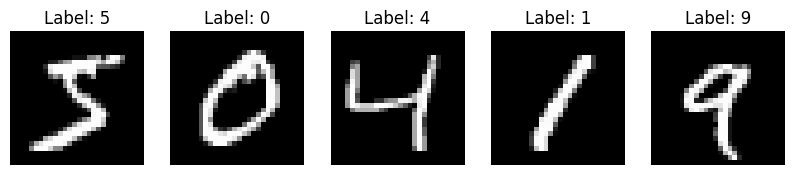

In [48]:
# Display 5 images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i], cmap='gray')  # Use grayscale for better visualization
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')  # Remove axis ticks
plt.show()

In [65]:
def create_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

In [66]:
model = create_model()

c:\Users\Domenick Dobbs\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [67]:
model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])


In [68]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [69]:
model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])
# model.fit(x_train, y_train, epochs=5)
# model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 833us/step - accuracy: 0.8601 - loss: 0.4865 - val_accuracy: 0.9614 - val_loss: 0.1347
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - accuracy: 0.9552 - loss: 0.1495 - val_accuracy: 0.9668 - val_loss: 0.1056
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step - accuracy: 0.9670 - loss: 0.1118 - val_accuracy: 0.9725 - val_loss: 0.0889
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step - accuracy: 0.9726 - loss: 0.0873 - val_accuracy: 0.9740 - val_loss: 0.0842
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - accuracy: 0.9766 - loss: 0.0718 - val_accuracy: 0.9762 - val_loss: 0.0788


In [70]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print the results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.9714 - loss: 0.0950
Test Loss: 0.0788
Test Accuracy: 0.9762


In [71]:
# Get training history
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 521us/step - accuracy: 0.9800 - loss: 0.0629
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 521us/step - accuracy: 0.9827 - loss: 0.0539
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 523us/step - accuracy: 0.9835 - loss: 0.0528
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 521us/step - accuracy: 0.9855 - loss: 0.0441
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 519us/step - accuracy: 0.9853 - loss: 0.0429


In [72]:
# Extract loss and accuracy values from history
train_loss = history.history['loss']
train_acc = history.history['accuracy']

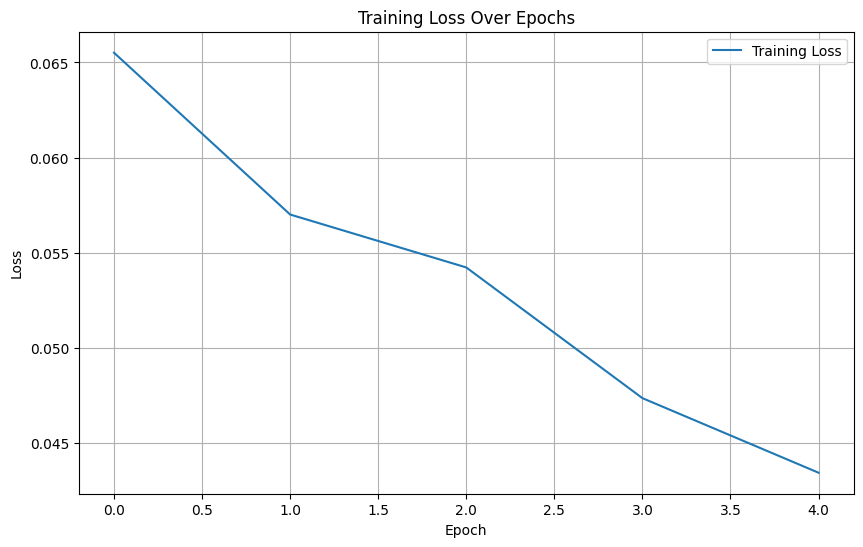

In [73]:
# Plot training loss
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(train_loss, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

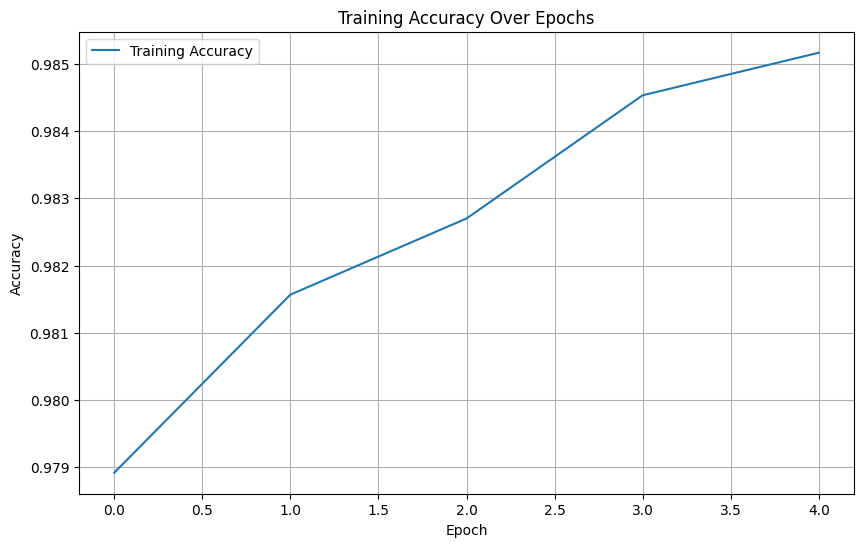

In [74]:
# Plot training accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_acc, label='Training Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 449952), started 1 day, 15:44:57 ago. (Use '!kill 449952' to kill it.)

In [76]:
# !kill 449952

: 